<a href="https://colab.research.google.com/github/jagadeep31/Learn-Flow-Task3-Health-Insurance-Claim-Prediction-/blob/main/Health_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the data
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('insurance.csv')

Mounted at /content/drive


In [ ]:
# Display basic information about the dataset
print(data.shape)
data.head()
data.describe()
data.isnull().sum()

(1338, 7)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-10-5a32aa823012>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


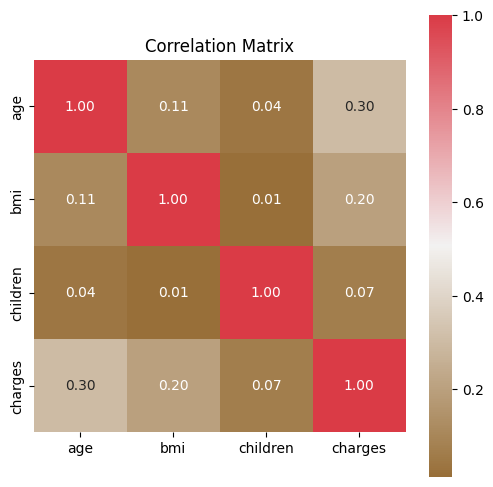

In [ ]:
# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(6,6))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(50, 10, as_cmap=True), square=True, annot=True, fmt=".2f", annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check if 'region' column exists before attempting to drop it
if 'region' in data.columns:
    # Removing unnecessary columns from the dataset
    data = data.drop('region', axis=1)
else:
    print("'region' column not found in the dataset.")

In [ ]:
# Display updated information about the dataset
print(data.shape)
print(data.columns)

(1338, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')


In [ ]:
# Label encoding for 'sex' and 'smoker'
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

In [ ]:
# Splitting the dataset into independent (x) and dependent (y) variables
x = data.iloc[:, :5]
y = data.iloc[:, 5]

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [ ]:
# Standard scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Creating the linear regression model
model = LinearRegression()
# Training the model
model.fit(x_train, y_train)

# Predicting the test set results
y_pred = model.predict(x_test)

# Calculating and displaying performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 37057975.78335928
Root Mean Squared Error (RMSE): 6087.526244983202
R2 Score: 0.759758528014896


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 45592342.88177423
RMSE : 6752.210221977262
r2 score : 0.7044314662733009


In [ ]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)

MSE : 174579621.41531378
RMSE : 13212.858184939161
r2 score : -0.13177431688675045
